In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

(307, 2)


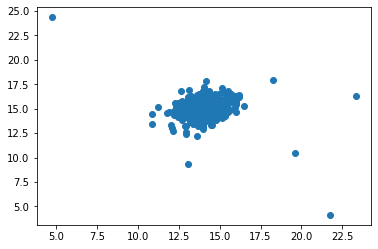

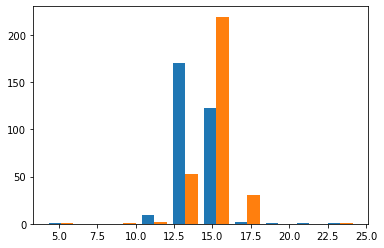

In [52]:
data = loadmat('ex8data1.mat')
X = data['X']
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()
plt.hist(X)
plt.show()

In [53]:
def calculate_gaussian(X):
    mu = []
    sigma =[]
    for i in range(X.shape[1]):
        mu.append(np.mean(X[:,i]))
        sigma.append(np.std(X[:,i]))
    return mu, sigma
        
calculate_gaussian(X)

([14.112225783945592, 14.99771050813621],
 [1.353747174879607, 1.3075723042450764])

In [54]:
Xval = data['Xval']
yval = data['yval']

print(Xval.shape, yval.shape)

(307, 2) (307, 1)


In [55]:
from scipy import stats
stats.norm.pdf(X[:50, 0],np.mean(X[:50, 0]),np.std(X[:50,0]))

array([0.20140987, 0.30075324, 0.42784855, 0.31669041, 0.34428372,
       0.41041232, 0.14554882, 0.12037962, 0.04576793, 0.11232379,
       0.41745239, 0.42371815, 0.29568993, 0.29667562, 0.41689509,
       0.42771763, 0.41507106, 0.41059368, 0.39142762, 0.0324931 ,
       0.33748993, 0.41762067, 0.30194167, 0.42683584, 0.20187842,
       0.12905488, 0.35479384, 0.34199731, 0.38992236, 0.4065998 ,
       0.15337102, 0.41649004, 0.17727405, 0.16102616, 0.06230589,
       0.31362684, 0.07715998, 0.42505859, 0.39942598, 0.42761572,
       0.40223422, 0.22102112, 0.40346303, 0.42783451, 0.36511346,
       0.39763696, 0.06510954, 0.42683462, 0.39944649, 0.18105687])

In [56]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm.pdf(Xval[:,0], loc=np.mean(Xval[:,0]), scale=np.std(Xval[:,0]))
pval[:,1] =  stats.norm.pdf(Xval[:,1], loc=np.mean(Xval[:,0]), scale=np.std(Xval[:,1]))

In [57]:
print(pval[:,1].min())
print(pval[:,1].max())
pval[:10, 1]

7.140328810102403e-13
0.3128581393860527


array([0.24364656, 0.18447606, 0.04906243, 0.31277169, 0.14014751,
       0.07847011, 0.20751005, 0.16941127, 0.30506032, 0.24638166])

In [58]:
from sklearn.metrics import f1_score
def select_threshold(pval, yval):
  bf1 = 0
  bthres = 0
  for tres in np.linspace(pval.min(), pval.max(), 10000).tolist():
    t = pval <= tres
    y = np.logical_or(t[:,0],t[:,1])
    f1 = f1_score(yval, y)
    if f1 > bf1:
      bf1 = f1
      bthres = tres
  return bthres, bf1

In [59]:
best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1

(0.001720891855808871, 0.823529411764706)

In [74]:
t1 = pval[:,0] < best_epsilon
t2 = pval[:,1] < best_epsilon
y = np.logical_or(t1,t2).astype(int)
anomalies = np.where(y == 1)
print(anomalies, y)
AN = np.zeros((anomalies[0].shape[0], 2))
for ii in range (0, anomalies[0].shape[0]):
    AN[ii, 0] = X[anomalies[0][ii], 0]
    AN[ii, 1] = X[anomalies[0][ii], 1]

(array([246, 300, 301, 302, 303, 304, 305, 306], dtype=int64),) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1]


Text(0.5, 1.0, 'Final result')

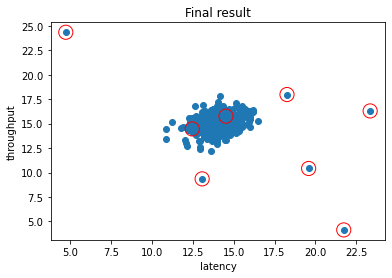

In [75]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(AN[:,0], AN[:,1], s=200, facecolors='none', edgecolors='r')
plt.xlabel('latency')
plt.ylabel('throughput')
plt.title('Final result')